<a href="https://colab.research.google.com/github/Prathamesh-chougale-17/Abstract-of-Machine-Learning-course/blob/main/Deep-Learning/Artificial-Neural-Network/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [132]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [133]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [134]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [135]:
y

array([1, 0, 1, ..., 1, 1, 0])

### Encoding categorical data

Label Encoding the "Gender" column

In [136]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [137]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

One Hot Encoding the "Geography" column

we have to change only index and not need to pass whole 2d array to get output

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [139]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### Splitting the dataset into the Training set and Test set

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
X_train

array([[-0.99850112,  1.71490137, -0.57273139, ..., -1.55337352,
         0.97725852,  0.42739449],
       [ 1.00150113, -0.58312392, -0.57273139, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 1.00150113, -0.58312392, -0.57273139, ...,  0.64376017,
         0.97725852,  0.01781218],
       [-0.99850112,  1.71490137, -0.57273139, ...,  0.64376017,
        -1.02327069, -1.15822478]])

## Part 2 - Building the ANN

### Initializing the ANN

In [143]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [144]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the second hidden layer

In [145]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

In [146]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# for non binary we have "softmax"

## Part 3 - Training the ANN

### Compiling the ANN

In [147]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [148]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.7964
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4693 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7972
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7972
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.7972
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.7972
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.8000
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8146
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4070 - accuracy: 0.8231
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3992 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [149]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
Z = np.array([[600,'France','Male',40,3,60000,2,1,1,50000]])
Z[:,2] = le.transform(Z[:,2])
Z = np.array(ct.transform(Z))
Z = sc.transform(Z)

In [151]:
Z

array([[ 1.00150113, -0.58312392, -0.57273139, -0.52046273,  0.91509065,
         0.10629772, -0.70174202, -0.26396987,  0.80225696,  0.64376017,
         0.97725852, -0.87097985]])

In [152]:
ann.predict(Z)

1/1 [==============================] - 0s 82ms/step


array([[0.03628327]], dtype=float32)

In [154]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))

1/1 [==============================] - 0s 21ms/step
[[0.03628327]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [159]:
y_predict = ann.predict(X_test)
y_predict = (y_predict>0.5)

63/63 [==============================] - 0s 2ms/step


In [160]:
print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Making the Confusion Matrix

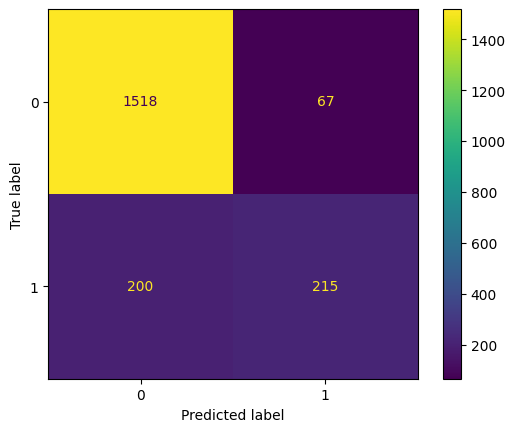

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_predict)
# print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [164]:
accuracy_score(y_test, y_predict)

0.8665